In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [ ]:
# import LAX Cargo Csv as cargo_df
cargo_df = pd.read_csv(r'/Users/isaganijulian/Downloads/LAX_Cargo.csv')

In [ ]:
# Define dictionary to map old to new column names
column_name_mapping = { 
'DataExtractDate' : 'Extract_Date', 
'ReportPeriod' : 'Report_Period', 
'Cargo_Type ' : 'Cargo_Type', 
'AirCargoTons' : 'Tons'
}

#rename
cargo_df.rename(columns=column_name_mapping, inplace=True)

print(cargo_df)


                Extract_Date Report_Period Arrival_Departure  \
0     04/09/2021 10:34:29 AM      Sep 2020           Arrival   
1     04/09/2021 10:34:29 AM      Feb 2021           Arrival   
2     04/09/2021 10:34:29 AM      Aug 2020           Arrival   
3     04/09/2021 10:34:29 AM      Jan 2021           Arrival   
4     04/09/2021 10:34:29 AM      Nov 2020           Arrival   
...                      ...           ...               ...   
1707  08/01/2023 12:00:18 AM      Jun 2023           Arrival   
1708  08/01/2023 12:00:18 AM      Jun 2023         Departure   
1709  08/01/2023 12:00:18 AM      Jun 2023         Departure   
1710  08/01/2023 12:00:18 AM      Jun 2023           Arrival   
1711  08/01/2023 12:00:18 AM      Jun 2023           Arrival   

     Domestic_International Cargo_Type   Tons  
0             International    Freight  86595  
1             International    Freight  78931  
2             International    Freight  81369  
3             International    Freight 

In [ ]:
import pandas as pd 
from datetime import datetime 

# Convert the Extract_Date original format date 
cargo_df['Extract_Date'] = pd.to_datetime(cargo_df['Extract_Date'], format='%m/%d/%Y %I:%M:%S %p')

# Convert to desired format
cargo_df['Extract_Date'] = cargo_df['Extract_Date'].dt.strftime('%Y, %B %d, %A %I:%M:%S %p')

# Convert for Report_Period
cargo_df['Report_Period'] = pd.to_datetime(cargo_df['Report_Period'], format='%b %Y')

# Convert to desired format
cargo_df['Report_Period'] = cargo_df['Report_Period'].dt.strftime('%Y,%B')

print(cargo_df)


                              Extract_Date   Report_Period Arrival_Departure  \
0       2021, April 09, Friday 10:34:29 AM  2020,September           Arrival   
1       2021, April 09, Friday 10:34:29 AM   2021,February           Arrival   
2       2021, April 09, Friday 10:34:29 AM     2020,August           Arrival   
3       2021, April 09, Friday 10:34:29 AM    2021,January           Arrival   
4       2021, April 09, Friday 10:34:29 AM   2020,November           Arrival   
...                                    ...             ...               ...   
1707  2023, August 01, Tuesday 12:00:18 AM       2023,June           Arrival   
1708  2023, August 01, Tuesday 12:00:18 AM       2023,June         Departure   
1709  2023, August 01, Tuesday 12:00:18 AM       2023,June         Departure   
1710  2023, August 01, Tuesday 12:00:18 AM       2023,June           Arrival   
1711  2023, August 01, Tuesday 12:00:18 AM       2023,June           Arrival   

     Domestic_International Cargo_Type 

In [ ]:
# Display basic summary statistics
summary_stats = cargo_df.describe()

# Display the number of unique values in each column
unique_counts = cargo_df.nunique()

# Display the data types of each column
data_types = cargo_df.dtypes

# Display missing values count in each column
missing_values = cargo_df.isnull().sum()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

# Display unique value counts
print("\nUnique Value Counts:")
print(unique_counts)

# Display data types
print("\nData Types:")
print(data_types)

# Display missing values
print("\nMissing Values:")
print(missing_values)




Summary Statistics:
                Tons
count    1712.000000
mean    22752.660047
std     23527.090982
min       330.000000
25%      1657.750000
50%     14916.000000
75%     38419.750000
max    105462.000000

Unique Value Counts:
Extract_Date                84
Report_Period              214
Arrival_Departure            2
Domestic_International       2
Cargo_Type                   2
Tons                      1616
dtype: int64

Data Types:
Extract_Date              object
Report_Period             object
Arrival_Departure         object
Domestic_International    object
Cargo_Type                object
Tons                       int64
dtype: object

Missing Values:
Extract_Date              0
Report_Period             0
Arrival_Departure         0
Domestic_International    0
Cargo_Type                0
Tons                      0
dtype: int64


In [ ]:
cargo_df.to_csv('cargo_df.csv', index=False)

In [8]:
cargo_df=pd.read_csv(r'/Users/isaganijulian/Documents/GitHub/LAX_Analysis/cargo/cargo_df.csv')


In [ ]:
cargo_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Extract_Date            1712 non-null   object
 1   Report_Period           1712 non-null   object
 2   Arrival_Departure       1712 non-null   object
 3   Domestic_International  1712 non-null   object
 4   Cargo_Type              1712 non-null   object
 5   Tons                    1712 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 80.4+ KB


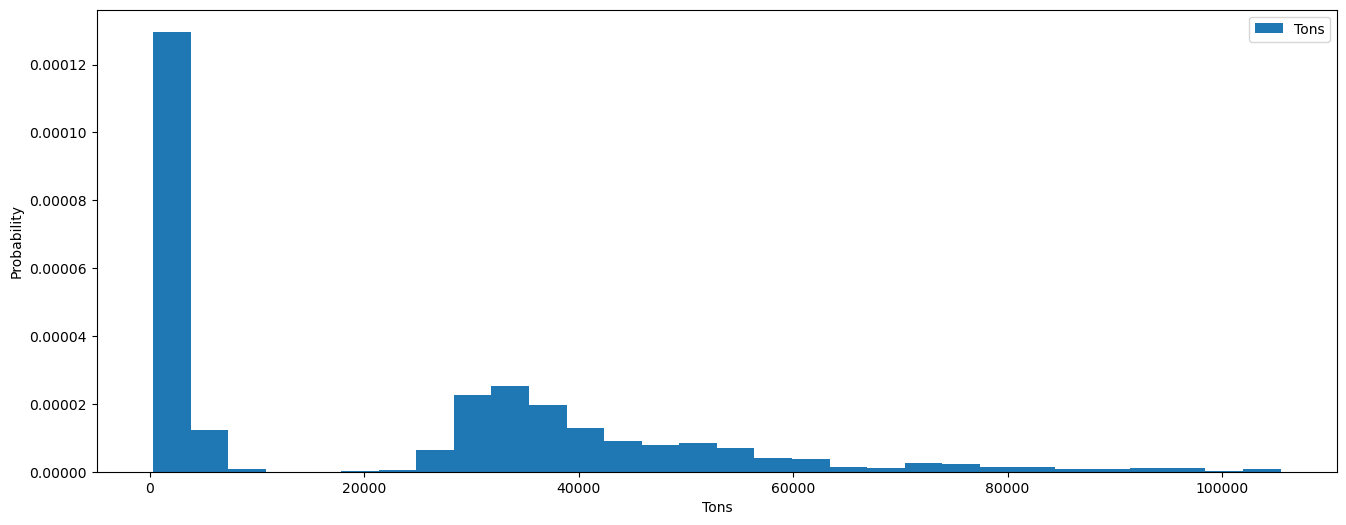

In [ ]:
cargo_df.plot(kind="hist", y="Tons", figsize=(16, 6), bins=30, density=True)
plt.xlabel("Tons")
plt.ylabel('Probability')
plt.show()

The Extract Date column was dropped, the Report_Period data type was changed to datetime, while the rest of the categories data types were changed to categories except for the Tons column. 

In [11]:
cargo_df=cargo_df.drop(["Extract_Date"], axis=1)

In [12]:
cargo_df.Report_Period= pd.to_datetime(cargo_df.Report_Period)
cargo_df["Arrival_Departure"]=cargo_df["Arrival_Departure"].astype("category")
cargo_df["Domestic_International"]=cargo_df["Domestic_International"].astype("category")
cargo_df["Cargo_Type"]=cargo_df["Cargo_Type"].astype("category")



/var/folders/cp/wjt9yn4d1mvbjrvvv6c8176w0000gn/T/ipykernel_72188/1692204034.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cargo_df.Report_Period= pd.to_datetime(cargo_df.Report_Period)


In [ ]:
cargo_df.dtypes

Report_Period             datetime64[ns]
Arrival_Departure               category
Domestic_International          category
Cargo_Type                      category
Tons                               int64
dtype: object

Set Report_Period as the index

In [16]:
data1=cargo_df.set_index("Report_Period")

In [17]:
data1.head()

,Arrival_Departure,Domestic_International,Cargo_Type,Tons
Report_Period,,,,
2020-09-01,Arrival,International,Freight,86595
2021-02-01,Arrival,International,Freight,78931
2020-08-01,Arrival,International,Freight,81369
2021-01-01,Arrival,International,Freight,82958
2020-11-01,Arrival,International,Freight,96096


In [ ]:
# Set index to datetime
data1.index = pd.to_datetime(data1.index)

# Exclude categorical columns from resampling
resampled_df = data1.select_dtypes(exclude=['category']).resample('A').mean()

resampled_df

,Tons
Report_Period,
2006-12-31,21905.322917
2007-12-31,21232.083333
2008-12-31,18712.854167
2009-12-31,17332.718750
2010-12-31,20070.541667
2011-12-31,19475.020833
2012-12-31,20383.583333
2013-12-31,20131.729167
2014-12-31,20863.125000


Text(0.5, 1.0, 'Average Air Cargo Tons According to Year')

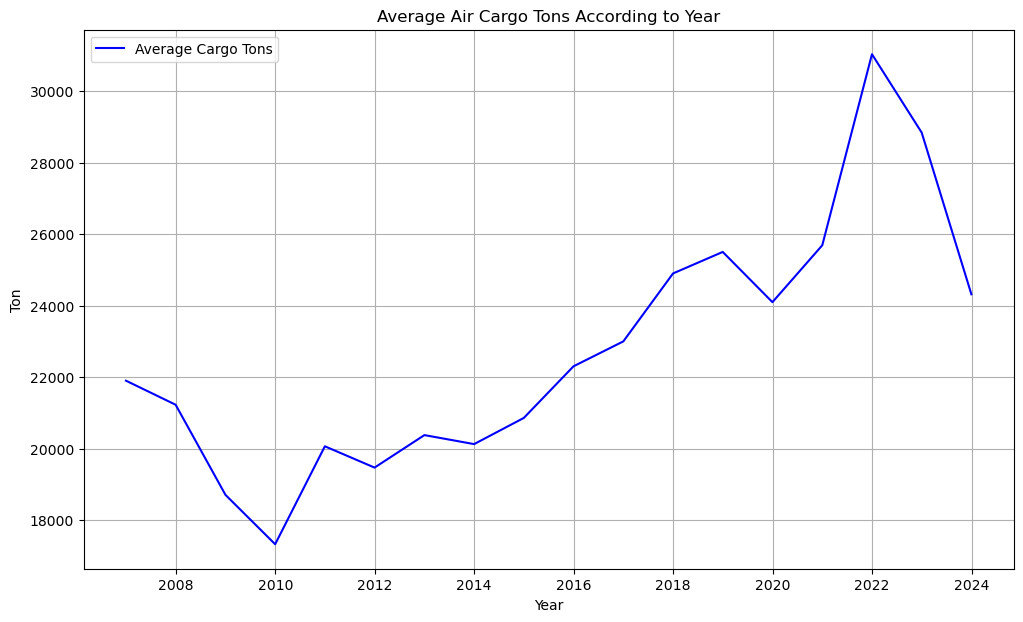

In [ ]:
plt.figure(figsize=(12,7))
plt.plot( data1.select_dtypes(exclude=['category']).resample('A').mean(), color="b",label= "Average Cargo Tons") 
plt.grid() 
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ton")
plt.title("Average Air Cargo Tons According to Year")


From the graph 2010 has the lowest count of tons for air travel, and starting from 2012 the average amount of tons for air travel seems to increse. There is a spike in average tons for air travel starting from 2020 to 2022. 

In [ ]:
month = data1.select_dtypes(exclude=['category']).resample('M').mean()

# Minummum average tons and the datetime
print(month.min())
print(month.idxmin())



Tons    14150.125
dtype: float64
Tons   2009-02-28
dtype: datetime64[ns]


In [ ]:
# Max average tons and the datetime
print(month.max())
print(month.idxmax())

Tons    33078.5
dtype: float64
Tons   2021-03-31
dtype: datetime64[ns]


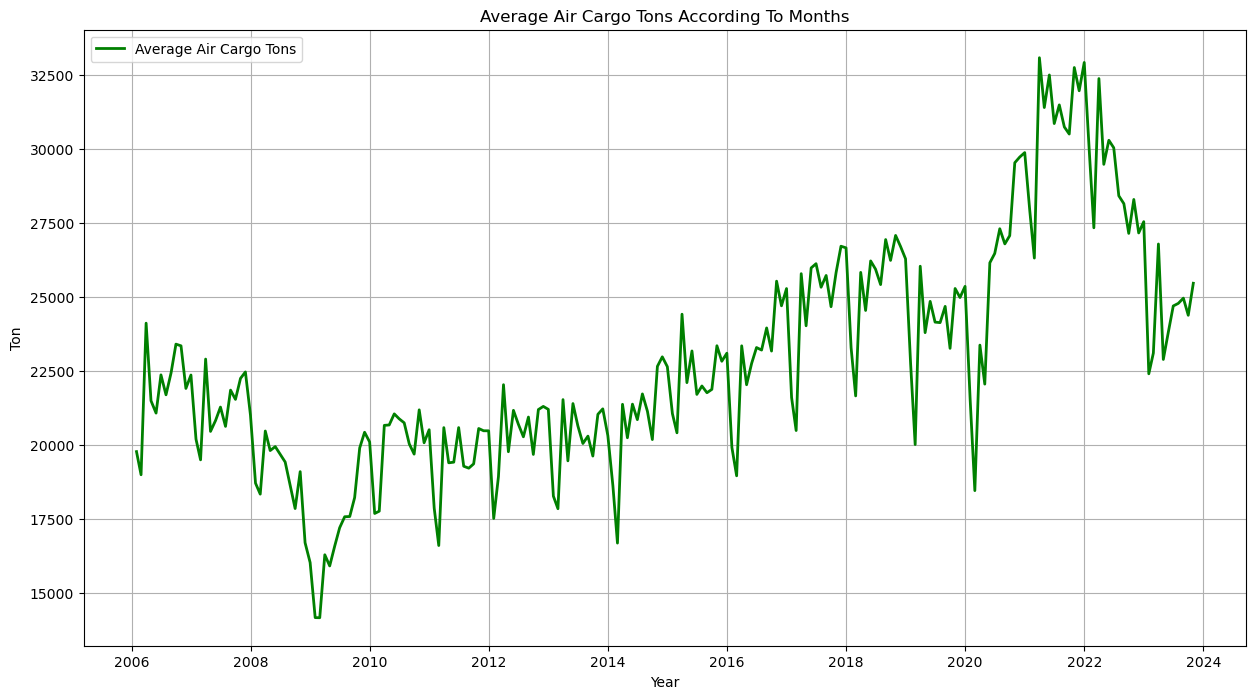

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data1.select_dtypes(exclude=['category']).resample('M').mean(),color="g",label="Average Air Cargo Tons",linewidth=2)
plt.grid()
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ton")
plt.title("Average Air Cargo Tons According To Months")
plt.show()

This shows a more accurate graph basing the data on the months. We can see that the average amount of tons for air travel increases and decreases frequently throughout the years. During the year of 2019 we can see a dip in the cargo tons, which was the start of the pandemic. Once travel restrictions were lifted we can see an increase in the average tons for the air cargo. 

In [13]:
data2=cargo_df.set_index(["Report_Period","Arrival_Departure","Domestic_International","Cargo_Type"])

In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1712 entries, (Timestamp('2020-09-01 00:00:00'), 'Arrival', 'International', 'Freight') to (Timestamp('2023-06-01 00:00:00'), 'Arrival', 'International', 'Mail')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Tons    1712 non-null   int64
dtypes: int64(1)
memory usage: 32.1 KB


In [ ]:
data2.head(20)

Tons
Report_Period Arrival_Departure Domestic_International Cargo_Type        
2020-09-01    Arrival           International          Freight      86595
2021-02-01    Arrival           International          Freight      78931
2020-08-01    Arrival           International          Freight      81369
2021-01-01    Arrival           International          Freight      82958
2020-11-01    Arrival           International          Freight      96096
2021-04-01    Arrival           International          Mail           921
                                Domestic               Mail          3197
2021-03-01    Arrival           International          Freight     100358
2021-04-01    Departure         Domestic               Freight      40285
2021-03-01    Departure         Domestic               Freight      43444
2021-04-01    Arrival           International          Freight      97048
2021-03-01    Departure         International          Freight      66254
2021-04-01    Departure         International          Freight      60458
2021-03-01    Arrival           International          Mail           913
2021-04-01    Arrival           Domestic               Freight      43368
              Departure         International          Mail           412
                                Domestic               Mail          5468
2021-03-01    Departure         International          Mail           403
                                Domestic               Mail          5677
              Arrival           Domestic               Freight      44001

In [ ]:
cargotype=pd.concat([data1.groupby("Cargo_Type")["Tons"].idxmin(),data1.groupby("Cargo_Type")["Tons"].min(),data1.groupby("Cargo_Type")["Tons"].idxmax(),data1.groupby("Cargo_Type")["Tons"].max()],axis=1)
cargotype.columns.values[0:4]="Minimum Weight Date","Minimum Weight","Maximum Weight Date","Maximum Weight"
cargotype

,Minimum Weight Date,Minimum Weight,Maximum Weight Date,Maximum Weight
Cargo_Type,,,,
Freight,2020-02-01,20640,2021-11-01,105462
Mail,2023-02-01,330,2019-12-01,9192


In [24]:
data1.head(20)

,Arrival_Departure,Domestic_International,Cargo_Type,Tons
Report_Period,,,,
2020-09-01,Arrival,International,Freight,86595
2021-02-01,Arrival,International,Freight,78931
2020-08-01,Arrival,International,Freight,81369
2021-01-01,Arrival,International,Freight,82958
2020-11-01,Arrival,International,Freight,96096
2021-04-01,Arrival,International,Mail,921
2021-04-01,Arrival,Domestic,Mail,3197
2021-03-01,Arrival,International,Freight,100358
2021-04-01,Departure,Domestic,Freight,40285


In [19]:
freight=data1[data1.Cargo_Type=="Freight"]
mail=data1[data1.Cargo_Type=="Mail"]

# Display the filtered DataFrames
print("Freight:")
print(freight)

print("\nMail:")
print(mail)

Freight:
              Arrival_Departure Domestic_International Cargo_Type   Tons
Report_Period                                                           
2020-09-01              Arrival          International    Freight  86595
2021-02-01              Arrival          International    Freight  78931
2020-08-01              Arrival          International    Freight  81369
2021-01-01              Arrival          International    Freight  82958
2020-11-01              Arrival          International    Freight  96096
...                         ...                    ...        ...    ...
2023-06-01            Departure               Domestic    Freight  35157
2023-05-01              Arrival          International    Freight  76742
2023-06-01              Arrival          International    Freight  75193
2023-06-01            Departure          International    Freight  47687
2023-06-01              Arrival               Domestic    Freight  33229

[856 rows x 4 columns]

Mail:
           

# Freight Cargo Type 

In [20]:
freight.describe()

,Tons
count,856.000000
mean,43544.288551
std,15501.603684
min,20640.000000
25%,32792.000000
50%,38424.500000
75%,50258.000000
max,105462.000000


There are 856 for the freight cargo type. There is an  average weight of 43,544 tons,  minnimum weight of 20,640 tons, and a maximum of 105,462 tons.  

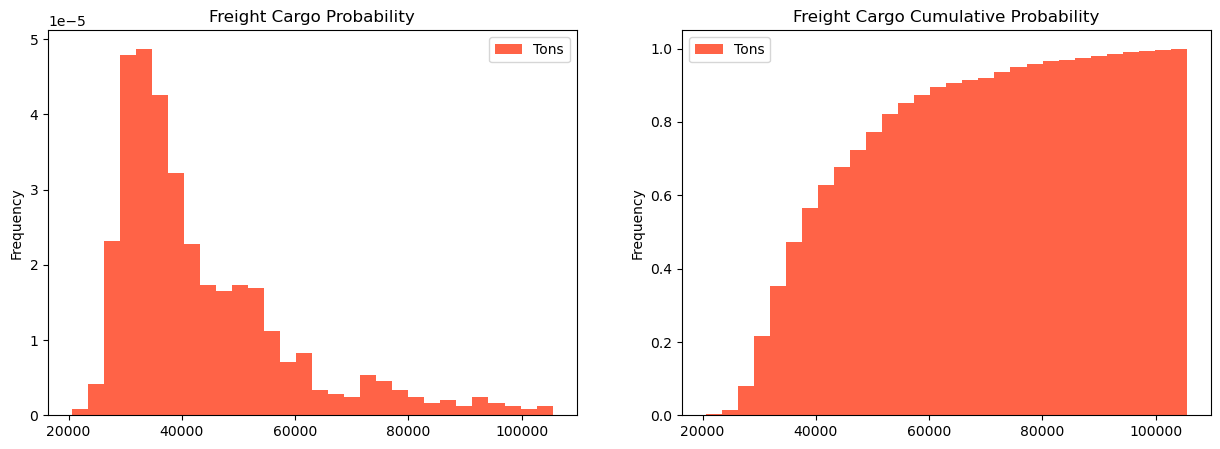

In [ ]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
freight.plot(kind="hist",bins=30,color="tomato",density=True, ax=axes[0],title="Freight Cargo Probability")
freight.plot(kind="hist",bins=30,color="tomato",density=True,ax=axes[1],cumulative=True,title="Freight Cargo Cumulative Probability",label="Tons")
plt.show()

Freight cargo years to month 

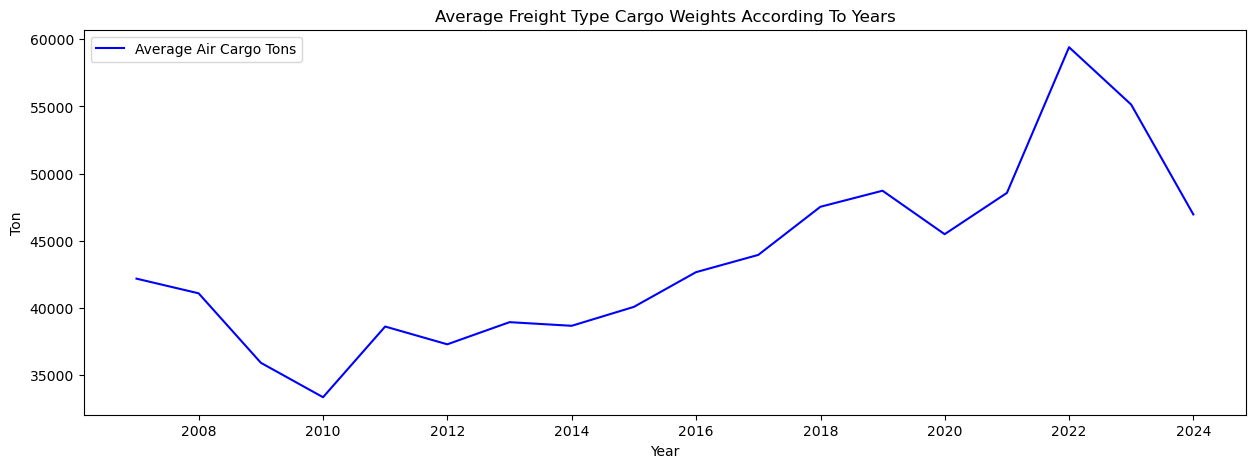

In [51]:
plt.figure(figsize=(15,5))
plt.plot(freight.select_dtypes(exclude=['category']).resample('A').mean(),color="b",label="Average Air Cargo Tons")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ton")
plt.title("Average Freight Type Cargo Weights According To Years")
plt.show()

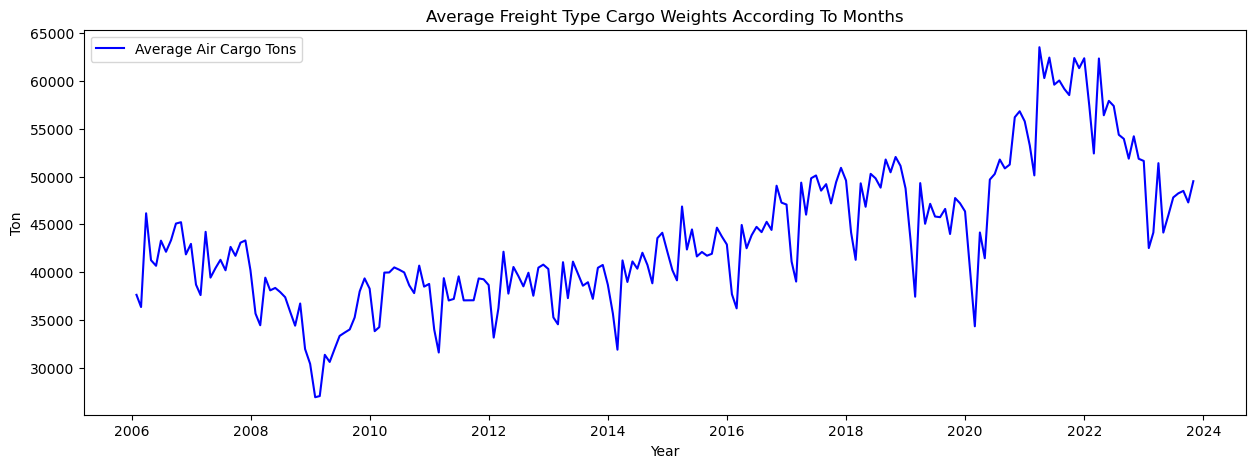

In [50]:
plt.figure(figsize=(15,5))
plt.plot(freight.select_dtypes(exclude=['category']).resample('M').mean(),color="b",label="Average Air Cargo Tons")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ton")
plt.title("Average Freight Type Cargo Weights According To Months")
plt.show()

# Mail Cargo

In [21]:
mail.describe()

,Tons
count,856.000000
mean,1961.031542
std,1341.960965
min,330.000000
25%,971.000000
50%,1657.500000
75%,2551.000000
max,9192.000000


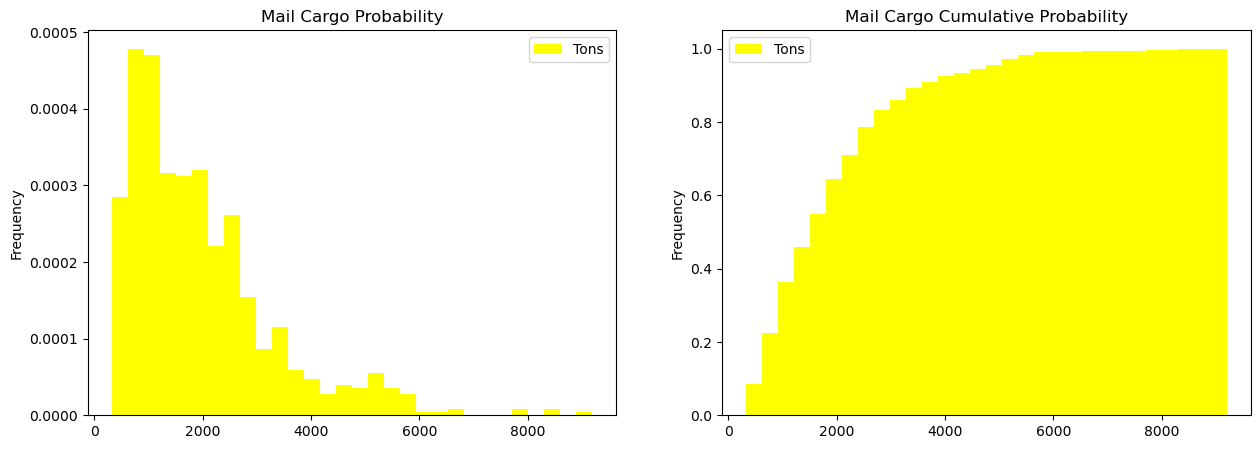

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
mail.plot(kind="hist",bins=30,color="yellow",density=True,ax=axes[0],title="Mail Cargo Probability")
mail.plot(kind="hist",bins=30,color="yellow",density=True,ax=axes[1],cumulative=True,title="Mail Cargo Cumulative Probability",label="Tons")
plt.show()

Weight cargo is depicted below according to years and months 

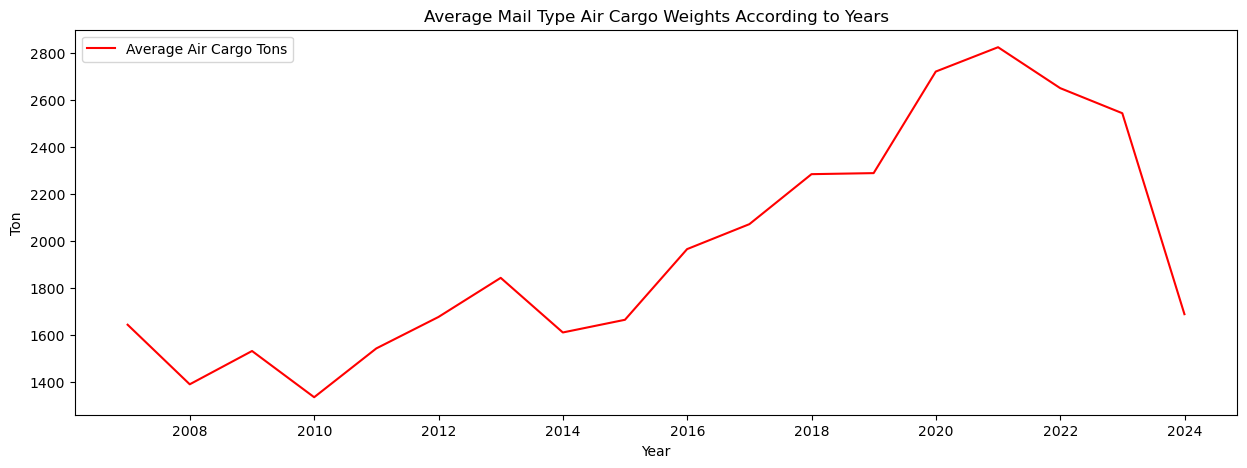

In [48]:
plt.figure(figsize=(15,5))
plt.plot(mail.select_dtypes(exclude=['category']).resample('A').mean(),color="r",label="Average Air Cargo Tons")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ton")
plt.title("Average Mail Type Air Cargo Weights According to Years")
plt.show()

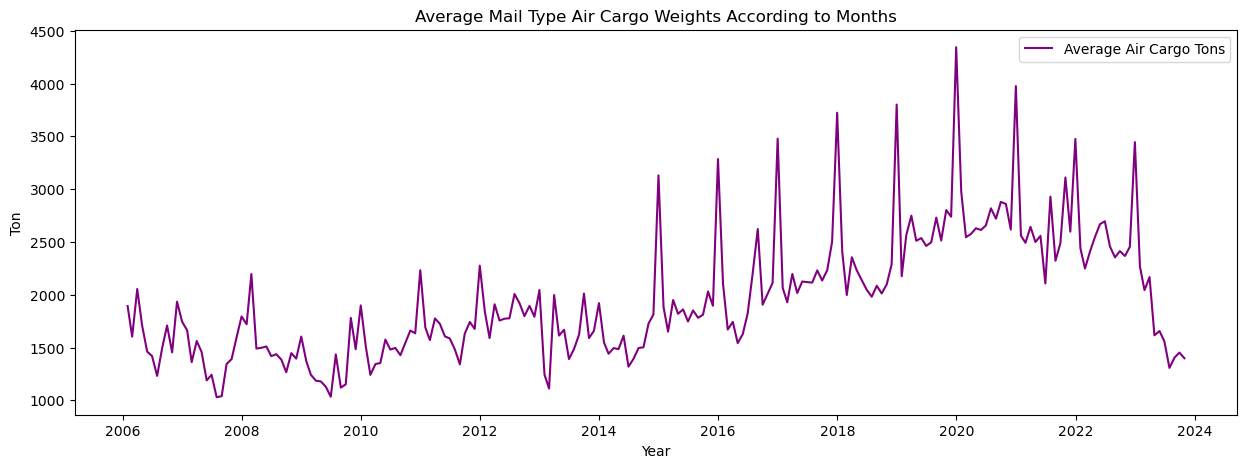

In [47]:
plt.figure(figsize=(15,5))
plt.plot(mail.select_dtypes(exclude=['category']).resample('M').mean(),color="purple",label="Average Air Cargo Tons")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Ton")
plt.title("Average Mail Type Air Cargo Weights According to Months")
plt.show()

We can see that the mail cargo weight spikes up and down in weight starting in 2015 and has its heightest recorded weight during the peak of the pandemic in 2020. 